# Count missing values in CAS tables+
[Getting Started with Python Integration to SAS® Viya® - Part 15 - Count Missing Values in a CAS Table](https://blogs.sas.com/content/sgf/2023/03/21/getting-started-with-python-integration-to-sas-viya-part-15-count-missing-values-in-a-cas-table/)

## Import Packages and Connect to the CAS Server

In [2]:
## Packages
import swat
import pandas as pd
import numpy as np
import os

## custom personal module to connect to my CAS environment
try:
    from casConnect import connect_to_cas 
except:
    print('casConnect package not available')

## Make a Connection to CAS (REQUIRED: MODIFY CONNECTION INFORMATION)

##### To connect to the CAS server you will need:
1. the host name, 
2. the portnumber, 
3. your user name, and your password.

Visit the documentation [Getting Started with SAS® Viya® for Python](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg3/titlepage.htm) for more information about connecting to CAS.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [3]:
##
## Connect to CAS
##

## General connection syntax
# conn = swat.CAS(host, port, username, password)

## SAS Viya for Learners 3.5 connection
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue, port=portValue, password=passwordToken)

## Personal connection
try:
    conn = connect_to_cas()
    print('CAS connection succesful')
    print(conn)
except:
    print('No connection')
    pass

CAS connection succesful
CAS('ssemonthly.demo.sas.com', 443, protocol='https', name='py-session-1', session='3e931275-ed7c-4146-8f86-657783f125d4')


## Load the demonstration data into memory

In [4]:
## Create a simple dataframe
df = pd.DataFrame([
            [np.nan, 2, 45, 0, 'A'],
            [3, 4, np.nan, 1,'A'],
            [np.nan, np.nan, 50, np.nan,'B'],
            [np.nan, 3, np.nan, 4,],
            [2, 2, np.nan, 0, 'A'],
            [3, 4, np.nan, 1,'A'],
            [np.nan, np.nan, 75, np.nan,'B'],
            [np.nan, 3, 60, 4,]
            ],
            columns=['col1','col2','col3','col4','col5'])

## Upload the dataframe to the CAS server as a CAS table
castbl = conn.upload_frame(df,
                           casout = {'name':'missing_data', 
                                     'caslib':'casuser', 
                                     'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table MISSING_DATA in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: The table MISSING_DATA has been created in caslib CASUSER(Peter.Styliadis@sas.com) from binary data uploaded to Cloud Analytic Services.


In [5]:
castbl.head(10)

,col1,col2,col3,col4,col5
0,NaN,2.0,45.0,0.0,A
1,3.0,4.0,NaN,1.0,A
2,NaN,NaN,50.0,NaN,B
3,NaN,3.0,NaN,4.0,
4,2.0,2.0,NaN,0.0,A
5,3.0,4.0,NaN,1.0,A
6,NaN,NaN,75.0,NaN,B
7,NaN,3.0,60.0,4.0,


## Using the SWAT nmiss method

In [6]:
castbl.nmiss()

col1    5
col2    2
col3    4
col4    2
col5    2
dtype: int64

<AxesSubplot: >

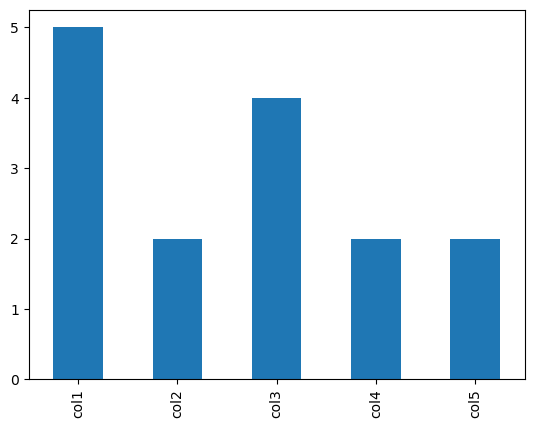

In [7]:
(castbl                    ## CAS table
 .nmiss()                  ## SWAT method
 .plot(kind = 'bar'))      ## Pandas plot

In [8]:
colNames = ['col1','col5']

castbl[colNames].nmiss()

col1    5
col5    2
dtype: int64

## Distinct CAS action

In [9]:
castbl.distinct()

,Column,NDistinct,NMiss,Trunc
0,col1,3.0,5.0,0.0
1,col2,4.0,2.0,0.0
2,col3,5.0,4.0,0.0
3,col4,4.0,2.0,0.0
4,col5,3.0,2.0,0.0


In [10]:
castbl.distinct(inputs = colNames)

,Column,NDistinct,NMiss,Trunc
0,col1,3.0,5.0,0.0
1,col5,3.0,2.0,0.0


## Summary CAS action

In [11]:
castbl.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,col1,2.0,3.0,3.0,5.0,2.666667,8.0,0.577350,0.333333,0.333333,22.0,0.666667,21.650635,8.000000,0.015268,-1.732051,NaN
1,col2,2.0,4.0,6.0,2.0,3.000000,18.0,0.894427,0.365148,0.800000,58.0,4.000000,29.814240,8.215838,0.000435,0.000000,-1.875000
2,col3,45.0,75.0,4.0,4.0,57.500000,230.0,13.228757,6.614378,175.000000,13750.0,525.000000,23.006533,8.693183,0.003203,0.863919,-0.285714
3,col4,0.0,4.0,6.0,2.0,1.666667,10.0,1.861899,0.760117,3.466667,34.0,17.333333,111.713920,2.192645,0.079830,0.723001,-1.875000


In [12]:
castbl.summary(inputs = ['col1','col2'], 
               subSet = ['min','max','nmiss'])

,Column,Min,Max,NMiss
0,col1,2.0,3.0,5.0
1,col2,2.0,4.0,2.0


## Terminate the CAS Session

In [13]:
conn.terminate()